## Consigne

Le travail attendu pour ces 3 semaines est à faire dans les fichiers `session1.py`, `session2.py`, `session3.py`. 

Les fichiers `session{1|2|3}.py` commenceront par un commentaire avec les noms de leur auteur :

```python
# prenom1 nom1
# prenom2 nom2
```

Une attention particulière sera portée à la qualité de la documentation de votre code.

Cette semaine, il s'agit de travaillr dans session1.py

In [1]:
import session1 as project
import pandas as pd

# Cultures associées et Maraîchage diversifié

L'agriculture est dominée par un modèle ou de grandes exploitations cultivent en monocultures. Pourtant, de plus en plus de données montrent que ce type d'agriculture n'est pas soutenable. En focalisant sur le maraîchage, ce sujet propose d'explorer la viabilité des fermes qui cultivent de multiples variétés de légumes. 

En particulier, on étudiera dans un premier temps les données qui indiquent si la pratique qui consiste à mélanger des cultures sur une même parcelle permet d'obtenir de bons rendements. Ensuite, il s'agit de déterminer si les fermes de maraîchage diversifiés sont viable en termes de revenus et de charge de travail. Enfin, on s'interessera à la façon de réaliser ces associations dans des simulations spatialisées de la ferme.

## Session 1: Analyse de données de cultures associées

On considère des associations de 2 cultures (Crop 1 et Crop 2) et on s'intéresse aux rendements de différentes couples de cultures associées ($I_i$ = Crop\_\{i\}\_yield_intercropped) comparés à ceux des cultures seules ($S_i$ = Crop\_\{i\}\_yield_sole). Pour une culture, on définit le ratio de terrain équivalent (LER-Land equivalent ratio) comme $LER_i=I_i/S_i$ avec $i \in \{1,2\}$. Le LER total pour une association est $LER_{tot} = \sum_{i \in \{1,2\}} LER_i$. 

On a a disposition 2 datasets qui rassemblent les rendements pour les cultures isolées et pour les cultures mélangées Ces données sont issues des publications suivantes:
* Li, C., Stomph, T. J., Makowski, D., Li, H., Zhang, C., Zhang, F., & van der Werf, W. (2023). The productive performance of intercropping. Proceedings of the National Academy of Sciences, 120(2), e2201886120
* Paut, R., Garreau, L., Ollivier, G., Sabatier, R., & Tchamitchian, M. (2024). A global dataset of experimental intercropping and agroforestry studies in horticulture. Scientific Data, 11(1), 5.

In [2]:
d1=pd.read_csv("data/session1/dataset_PNAS_2023.csv")
d2=pd.read_csv("data/session1/dataset_natcom_2024.csv")


1. Ces données sont parfois incomplètes, certaines entrées ne sont pas des nombres valides. Ecrire une fonction `get_valid_indices_all_vars` qui pour une liste de variables renvoie les indices où les entrées sont des nombres valides.

In [3]:
idxs = project.get_valid_indices_all_vars([d1['Crop_1_yield_sole'].to_numpy(),d1['Crop_2_yield_sole'].to_numpy()])
print("Only %s/%s entries have valid S_i in dataset 1"%(len(idxs), len(d1)))
idxs = project.get_valid_indices_all_vars([d2['Crop_1_yield_sole'].to_numpy(),d2['Crop_2_yield_sole'].to_numpy()])
print("Only %s/%s entries have valid S_i in dataset 2"%(len(idxs), len(d2)))

Only 934/934 entries have valid S_i in dataset 1
Only 956/1544 entries have valid S_i in dataset 2


2. Calculer les LERs pour les deux datasets en utilisants les entrées valides. Tracer la distribution des LERs et comparer les LERs ainsi calculés avec ceux des papiers (LER_tot). Fitter un modèle linéaire en utilisant sckit-learn.

In [4]:
LER_calc_1 = project.compute_LER(d1)
LER_calc_2 = project.compute_LER(d2)

RMSE: 1.6329509061755673e-05
R²: 0.9996849942993267


/home/yarina/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


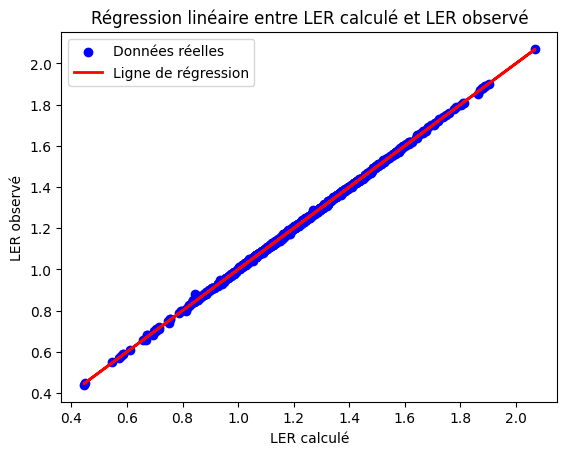

In [5]:
project.plot_LERs(LER_calc_1, d1['LER_tot'].to_numpy())

## Les points sont presque tous alignés avec la droite de régression, ce qui montre une relation linéaire très forte entre le LER calculé et le LER observé. Cet alignement suggère un coefficient de corrélation proche de 1 (R**2), ce qui signifie que les valeurs de LER calculées prédisent très bien les valeurs observées (aussi RMSE petite). Globalement, ce graphique indique que le modèle utilisé pour calculer le LER est très précis.

RMSE: 0.07852940138970738
R²: 0.6108283423933467


/home/yarina/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


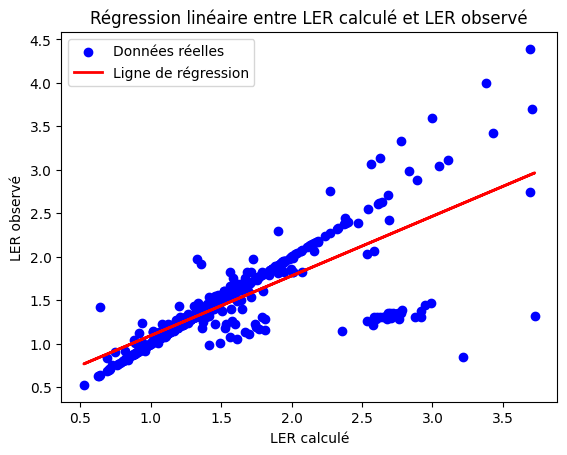

In [6]:
project.plot_LERs(LER_calc_2, d2['LER_tot'].to_numpy())

## La corrélation est plus faible : par rapport au premier graphique, les points sont davantage dispersés autour de la droite de régression, ce qui montre une relation linéaire moins forte entre le LER calculé et le LER observé.

## On constate une dispersion verticale marquée, surtout pour les valeurs de LER les plus élevées. Cela suggère que le modèle de calcul du LER manque de précision pour prédire les valeurs observées, avec une erreur de prédiction qui semble augmenter pour les valeurs de LER plus importantes.

## Enfin, plusieurs points s’écartent de la droite de régression, ce qui pourrait indiquer la présence de valeurs aberrantes. Cela laisse penser que le modèle rencontre des difficultés pour certaines observations.

3. Calculer la moyenne et la variance des LERs. Montrer que l'estimateur naïf pour la variance est biaisé. Calculer l'intervalle de confiance à 95%. Tester avec statsmodels l'hypothèse <span style="text-decoration:overline">LER</span>>1.

In [7]:
mLER, sLER, inter = project.compute_mean_std_inter(d1['LER_tot'].to_numpy())
print("Dataset 1 Mean: %s, Std: %s, interval .95: [%s, %s]"%(mLER, sLER, inter[0], inter[1]))

mLER, sLER, inter = project.compute_mean_std_inter(d2['LER_tot'].to_numpy())
print("Dataset 2 Mean: %s, Std: %s, interval .95: [%s, %s]"%(mLER, sLER, inter[0], inter[1]))

H0 = project.testH0(d1['LER_tot'].to_numpy())

Dataset 1 Mean: 1.21389721627409, Std: 0.22768129734656678, interval .95: [1.1992952954030875, 1.2284991371450924]
Dataset 2 Mean: 1.3941361746361747, Std: 0.4609378570563445, interval .95: [1.3650081580147109, 1.4232641912576385]
Statistique du test Z : 28.695817195922675
p-value : 2.1512281682255909e-181
Nous rejetons l'hypothèse nulle : la moyenne de LER est significativement supérieure à 1 au niveau de confiance de 95%.


4. Etudier la distribution des moyennes pour différents échantillons.

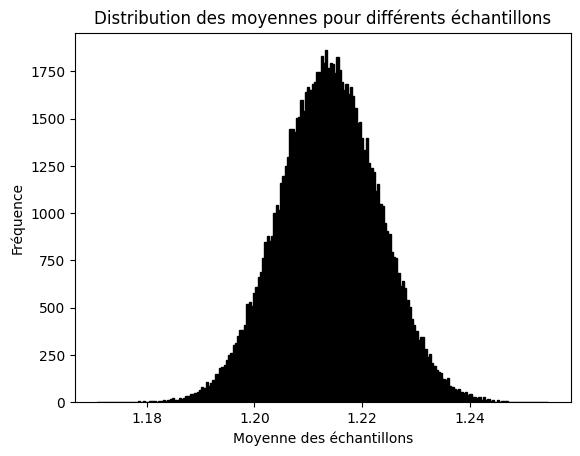

In [8]:
project.plot_dist_mean(d1['LER_tot'].to_numpy())

## Ce graphique montre la distribution des moyennes pour différents échantillons. On observe une forme de cloche, caractéristique d'une distribution normale, ce qui est attendu grâce au théorème central limite.
## La courbe est assez symétrique, avec une concentration de valeurs autour de la moyenne, et une diminution progressive vers les extrémités, indiquant une faible dispersion.
## Cette distribution normale des moyennes renforce l'idée que les estimations faites à partir de ces échantillons sont cohérentes et centrées autour d'une valeur moyenne stable.

4. Classer les cultures suivant la probabilité qu'une expérience montre un rendement accru pour l'association de culture (on ne considérera que les cultures qui interviennent dans plus de 10 expérience).

In [9]:
project.get_sorted_crops(d2)

[('Cabbage', 0.9393939393939394),
 ('Cauliflower', 0.9354838709677419),
 ('Strawberry', 0.8571428571428571),
 ('Safed musli', 0.8333333333333334),
 ('Carrot', 0.7037037037037037),
 ('Pepper', 0.6891891891891891),
 ('Mustard', 0.6666666666666666),
 ('Okra', 0.6216216216216216),
 ('Tomato', 0.6121212121212121),
 ('Fenugreek', 0.6086956521739131),
 ('Radish', 0.5833333333333334),
 ('Lablab bean', 0.5769230769230769),
 ('Apple', 0.5135135135135135),
 ('Squash', 0.5),
 ('Basil', 0.5),
 ('Cucumber', 0.48936170212765956),
 ('Eggplant', 0.45),
 ('Fava bean', 0.43661971830985913),
 ('Lettuce', 0.4117647058823529),
 ('Banana', 0.4),
 ('Collard', 0.38461538461538464),
 ('Onion', 0.3684210526315789),
 ('Beetroot', 0.36585365853658536),
 ('Maize', 0.33974358974358976),
 ('Groundnut', 0.3225806451612903),
 ('Potato', 0.32075471698113206),
 ('Millet', 0.2962962962962963),
 ('Pea', 0.29508196721311475),
 ('Peanut', 0.2708333333333333),
 ('Bean', 0.2696245733788396),
 ('Cowpea', 0.24537037037037038),
 

5. Déterminer les groupes de cultures qui s'associent bien (<span style="text-decoration:overline">LER</span>>1.8). On créera pour cela un graphe dont on isolera les composantes connexes en utilisant networkx.

Cluster 0
-----------
Spinach
Mustard
Strawberry
Marigold
Fava bean
Fenugreek
Lettuce
Onion
Maize
Safed musli
Pigeon pea
Radish
Lablab bean
-----------

Cluster 1
-----------
Rubber
Coffee arabica
Banana
-----------

Cluster 2
-----------
Bean
Parsley
Carrot
Pepper
-----------

Cluster 3
-----------
Xanthosoma
Turmeric
Cassava
Sapota
-----------

Cluster 4
-----------
Eggplant
Jackfruit
-----------

Cluster 5
-----------
Durum wheat
Olive
-----------

Cluster 6
-----------
Perennial ryegrass
Indian jujube
Rattan grass
-----------



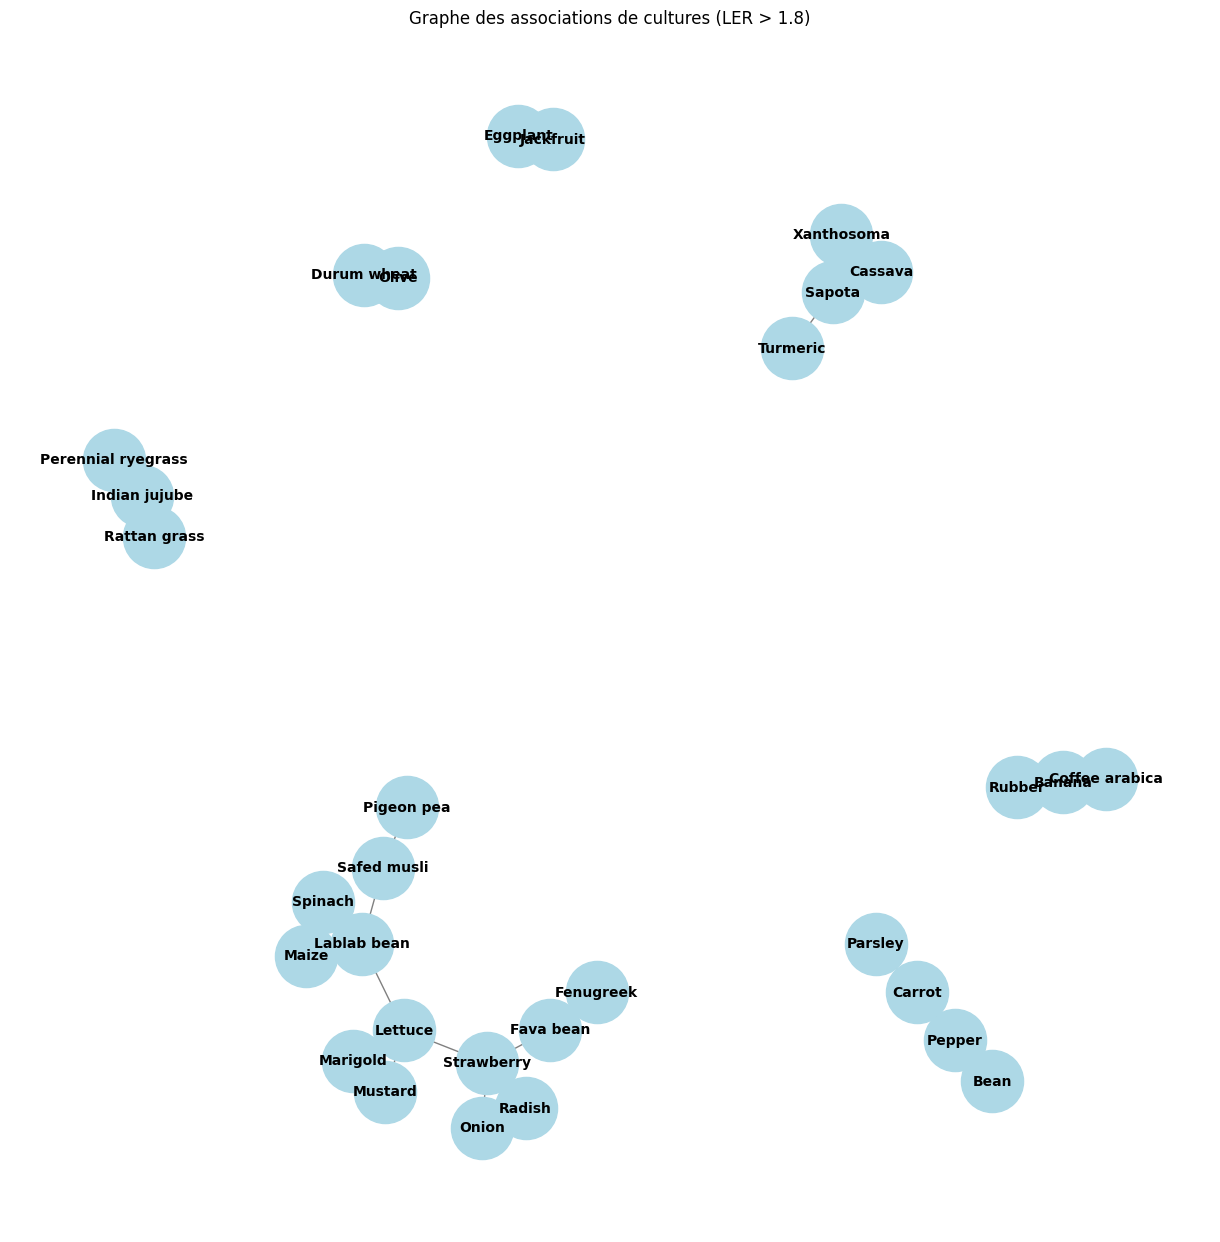

In [10]:
project.list_clusters(d2, th=1.8)